In [113]:
import random
import matplotlib.pyplot as plt

In [114]:
class Agent:
    def __init__(self, initial_wealth):
        self.no_of_product = 0
        self.price_of_product = 0
        self.money = initial_wealth

    def allot_goods(self):
        self.no_of_product = random.randint(1, 10)  # allocate a random number of goods between 1 and 10
        self.price_of_product = random.randint(10, 100)  # allocate a random price between 10.00 and 100.00

    def allot_money(self):
        self.money = random.randint(100, 500)

    def buy_goods(self, other_agent, num_goods, price):
        if random.random() < 0.1:  # 10% chance of buying goods
            self.no_of_product += num_goods
            self.money -= num_goods * price
            other_agent.no_of_product -= num_goods
            other_agent.money += num_goods * price

In [115]:
class Simulation:
    def __init__(self, num_agents, initial_wealth, num_time_steps, probability_dist, buy_prob, tax_model):
        self.num_agents = num_agents
        self.initial_wealth = initial_wealth
        self.num_time_steps = num_time_steps
        self.probability_dist = probability_dist
        self.buy_prob = buy_prob
        self.tax_model = tax_model
        self.agents = [Agent(initial_wealth) for _ in range(num_agents)]
        self.total_tax = 0

    def update_agents(self):
        random_indices = random.sample(range(self.num_agents), 2)
        agent1, agent2 = self.agents[random_indices[0]], self.agents[random_indices[1]]

        # Apply taxation individually to each agent
        tax1 = self.tax_model.calculate_tax(agent1)
        tax2 = self.tax_model.calculate_tax(agent2)
        self.total_tax += tax1 + tax2
        agent1.money -= tax1
        agent2.money -= tax2

        if random.random() < self.buy_prob:
            if agent1.money >= agent2.price_of_product:
                agent1.buy_goods(agent2, 1, agent2.price_of_product)
                agent1.money -= agent2.price_of_product
                agent2.money += agent2.price_of_product

                # Randomly adjust the number of goods and price
                agent2.no_of_product += random.randint(-1, 1)
                agent2.price_of_product += random.uniform(-10, 10)

    def run_simulation(self):
        for _ in range(self.num_time_steps):
            self.update_agents()

        # Redistribute the accumulated tax
        redistributed_amount = self.total_tax / self.num_agents
        for agent in self.agents:
            agent.money += redistributed_amount

    def print_stats(self):
        total_wealth = sum(agent.money for agent in self.agents)
        avg_wealth = total_wealth / self.num_agents
        print(f"Total wealth: {total_wealth}, Average wealth: {avg_wealth}")

In [116]:
class TaxModel:
    def calculate_tax(self, agent):
        raise NotImplementedError

class ProgressiveTaxModel(TaxModel):
    def __init__(self, brackets):
        self.brackets = brackets

    def calculate_tax(self, agent):
        wealth = agent.money
        tax = 0
        for threshold, rate in self.brackets:
            if wealth > threshold:
                tax += (wealth - threshold) * rate
                wealth = threshold
        return tax

In [117]:
# Define tax brackets for the progressive tax model
tax_brackets = [(100, 0.1), (450, 0.2), (1000, 0.32)]
progressive_tax_model = ProgressiveTaxModel(tax_brackets)

num_agents = 100
initial_wealth = 500
num_time_steps = 10000
probability_dist = (0.05, 0.95)

sim = Simulation(num_agents, initial_wealth, num_time_steps, probability_dist, 0.1, progressive_tax_model)
sim.run_simulation()

Minimum wealth: 211.5587865999454, Maximum wealth: 581.3423137929342
Mean wealth: 500.00, Median wealth: 516.10


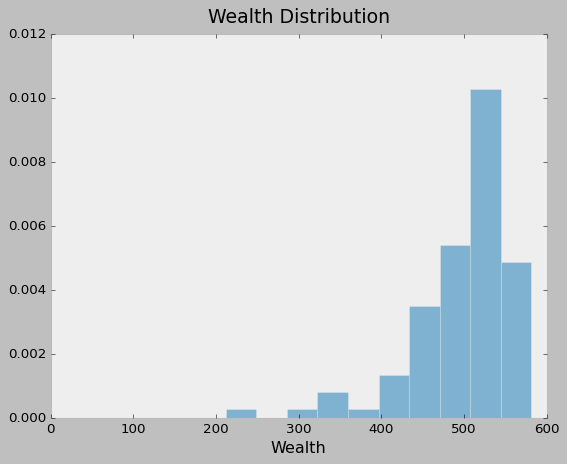

In [118]:
# Get the final wealth distribution
wealth_distribution = [agent.money for agent in sim.agents]
print(f"Minimum wealth: {min(wealth_distribution)}, Maximum wealth: {max(wealth_distribution)}")
print(f"Mean wealth: {sum(wealth_distribution) / num_agents:.2f}, Median wealth: {sorted(wealth_distribution)[num_agents//2]:.2f}")

plt.style.use("bmh")
plt.hist(wealth_distribution, density=True, alpha=0.6)
plt.title("Wealth Distribution", size=17, pad=10)
plt.xlabel("Wealth")
plt.ylabel("")
plt.grid(False)
plt.xticks(range(0, int(max(wealth_distribution)) + 100, 100))
plt.show()